In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Open the file
file_path = "./MERRA2_400.tavg1_2d_slv_Nx.20240101.nc4"
nc_data = Dataset(file_path, mode='r')

In [6]:
print(nc_data.variables['TO3'])

<class 'netCDF4._netCDF4.Variable'>
float32 TO3(time, lat, lon)
    long_name: total_column_ozone
    units: Dobsons
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    scale_factor: 1.0
    add_offset: 0.0
    standard_name: total_column_ozone
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (24, 361, 576)
filling on


In [7]:
nc_data.variables['TO3'][4, 2, 0]

masked_array(data=252.12955,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


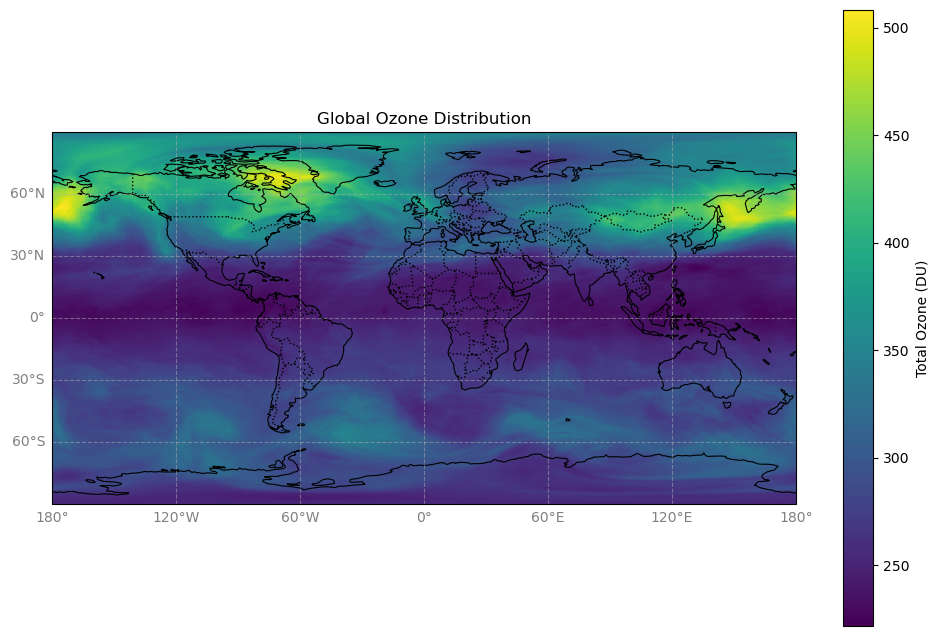

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# Open the NetCDF file
file_path = "MERRA2_400.tavg1_2d_slv_Nx.20240101.nc4"  # Replace with your file path
nc_data = Dataset(file_path, mode='r')

# Extract the data
lon = nc_data.variables['lon'][:]  # Longitude
lat = nc_data.variables['lat'][:]  # Latitude
ozone = nc_data.variables['TO3'][0, :, :]  # Select the first time step for TO3 (Total Ozone)

# Create the plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree projection (latitude/longitude)

# Add world map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot the ozone data on the map
mesh = plt.pcolormesh(lon, lat, ozone, transform=ccrs.PlateCarree(), cmap='viridis')
plt.colorbar(mesh, orientation='vertical', label='Total Ozone (DU)')  # Adjust label based on your units

# Add gridlines and labels
gridlines = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines.xlabels_top = False  # Disable labels at the top
gridlines.ylabels_right = False  # Disable labels on the right
gridlines.xlabel_style = {'size': 10, 'color': 'gray'}
gridlines.ylabel_style = {'size': 10, 'color': 'gray'}

# Set x and y ticks
#ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())  # Longitude from -180 to 180
#ax.set_yticks(range(-90, 91, 15), crs=ccrs.PlateCarree())  # Latitude from -90 to 90

# Add title
plt.title('Global Ozone Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()